# Speech Command Recognition using CNN and ANN

## Libraries

In [1]:
import librosa
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import IPython.display as ipd
import keras
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pickle as pk
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from pathlib import Path
from keras import layers, models
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import Sequential
from keras.layers import SpatialDropout2D, Conv2D, LeakyReLU, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D, Dense
from keras.regularizers import l2
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from model import AudioClassifier
from utils import *

2024-11-13 17:51:29.200349: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-13 17:51:29.263975: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731513089.330411   12175 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731513089.348750   12175 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-13 17:51:29.449387: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

## Loading the Data

In [2]:
features, y = prepare_dateset('./augmented_dataset/')

Processing class: go - 7116 files
Processing class: eight - 7056 files
Processing class: right - 7101 files
Processing class: bed - 5139 files
Processing class: up - 7125 files
Processing class: one - 7110 files
Processing class: stop - 7140 files
Processing class: tree - 5199 files
Processing class: happy - 5226 files
Processing class: dog - 5238 files
Processing class: cat - 5199 files
Processing class: on - 7101 files
Processing class: five - 7071 files
Processing class: yes - 7131 files
Processing class: sheila - 5202 files
Processing class: seven - 7131 files
Processing class: six - 7107 files
Processing class: off - 7071 files
Processing class: no - 7125 files
Processing class: house - 5250 files
Processing class: bird - 5193 files
Processing class: three - 7068 files
Processing class: nine - 7092 files
Processing class: two - 7119 files
Processing class: down - 7077 files
Processing class: left - 7059 files
Processing class: four - 7116 files
Processing class: marvin - 5238 file

In [3]:
X = np.array(features)
y = np.array(y)
unique_labels = np.unique(y)
CLASSES = [i for i in range(0,30)]
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print(f"Labels: {unique_labels}")

Shape of X: (194163, 40, 44)
Shape of y: (194163,)
Labels: ['bed' 'bird' 'cat' 'dog' 'down' 'eight' 'five' 'four' 'go' 'happy'
 'house' 'left' 'marvin' 'nine' 'no' 'off' 'on' 'one' 'right' 'seven'
 'sheila' 'six' 'stop' 'three' 'tree' 'two' 'up' 'wow' 'yes' 'zero']


## Train Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44, shuffle =True)
print(y_train)

['one' 'five' 'house' ... 'tree' 'down' 'eight']


## One Hot Encoding

In [5]:
le = LabelEncoder()
y_test_encoded = to_categorical(le.fit_transform(y_test))
y_train_encoded = to_categorical(le.fit_transform(y_train))

## Reshaping

In [6]:
num_rows = X.shape[1]
num_columns = X.shape[2]
num_channels = 1
print(f"({num_rows}, {num_columns}, {num_channels})")

(40, 44, 1)


In [7]:
X_train = X_train.reshape(X_train.shape[0], num_rows, num_columns, num_channels)
X_test = X_test.reshape(X_test.shape[0], num_rows, num_columns, num_channels)

In [8]:
X_train.shape

(155330, 40, 44, 1)

In [9]:
num_labels = y_train_encoded.shape[1]
print(f"Number of Classes: {num_labels}")

Number of Classes: 30


## ANN Model

In [13]:
# ann_model = AudioClassifier.build_ann_model((num_rows, num_columns, num_channels), num_labels)
ann_model = models.load_model('./AnnModelFinalV2_best_model.keras')

In [ ]:
history = AudioClassifier.train(ann_model, X_train, y_train_encoded, "AnnModelFinalV3", epochs=64)

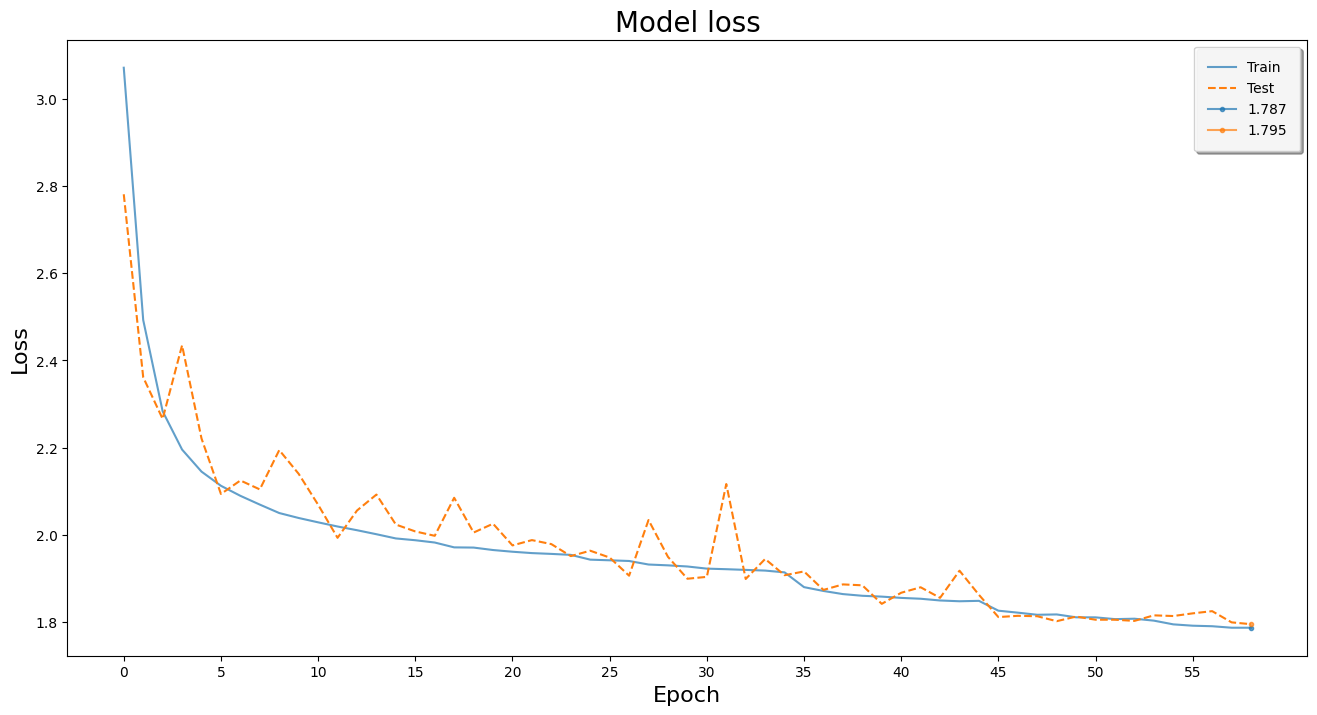

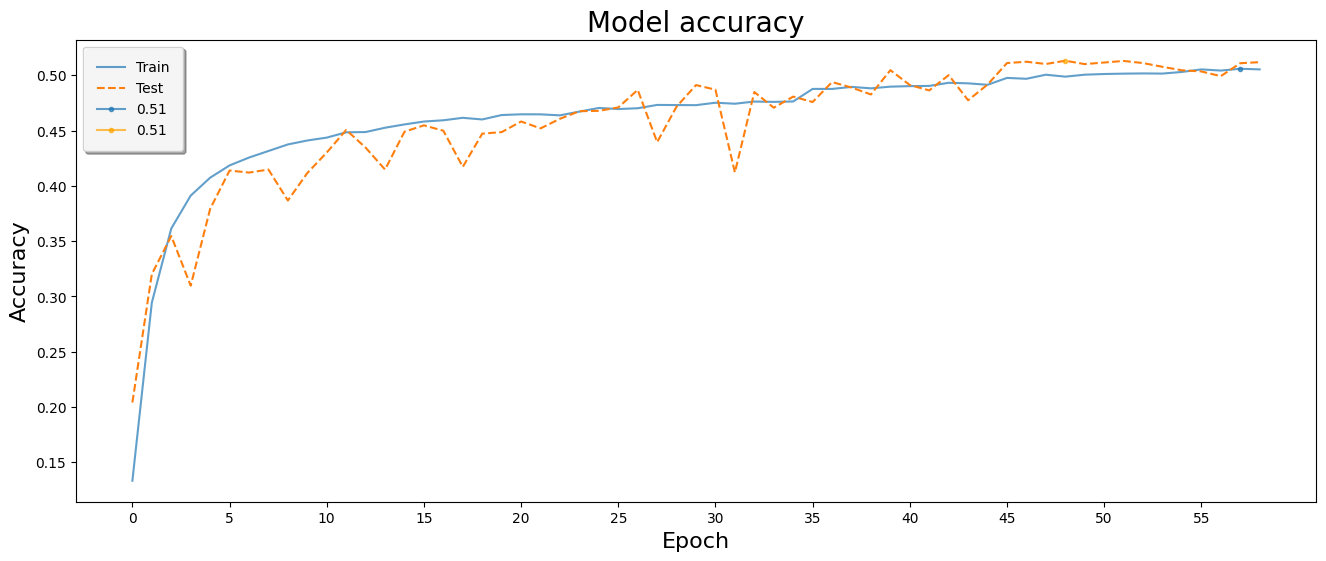

In [12]:
AudioClassifier.plot_train_history(history)

In [13]:
ann_model.evaluate(X_test,y_test_encoded)

1214/1214 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5101 - loss: 1.8076


[1.804376244544983, 0.5094893574714661]

In [14]:
# Predict probabilities for test set
y_probs = ann_model.predict(X_test, verbose=0)

# Get predicted labels
yhat_probs = np.argmax(y_probs, axis=1)
y_trues = np.argmax(y_test_encoded, axis=1)

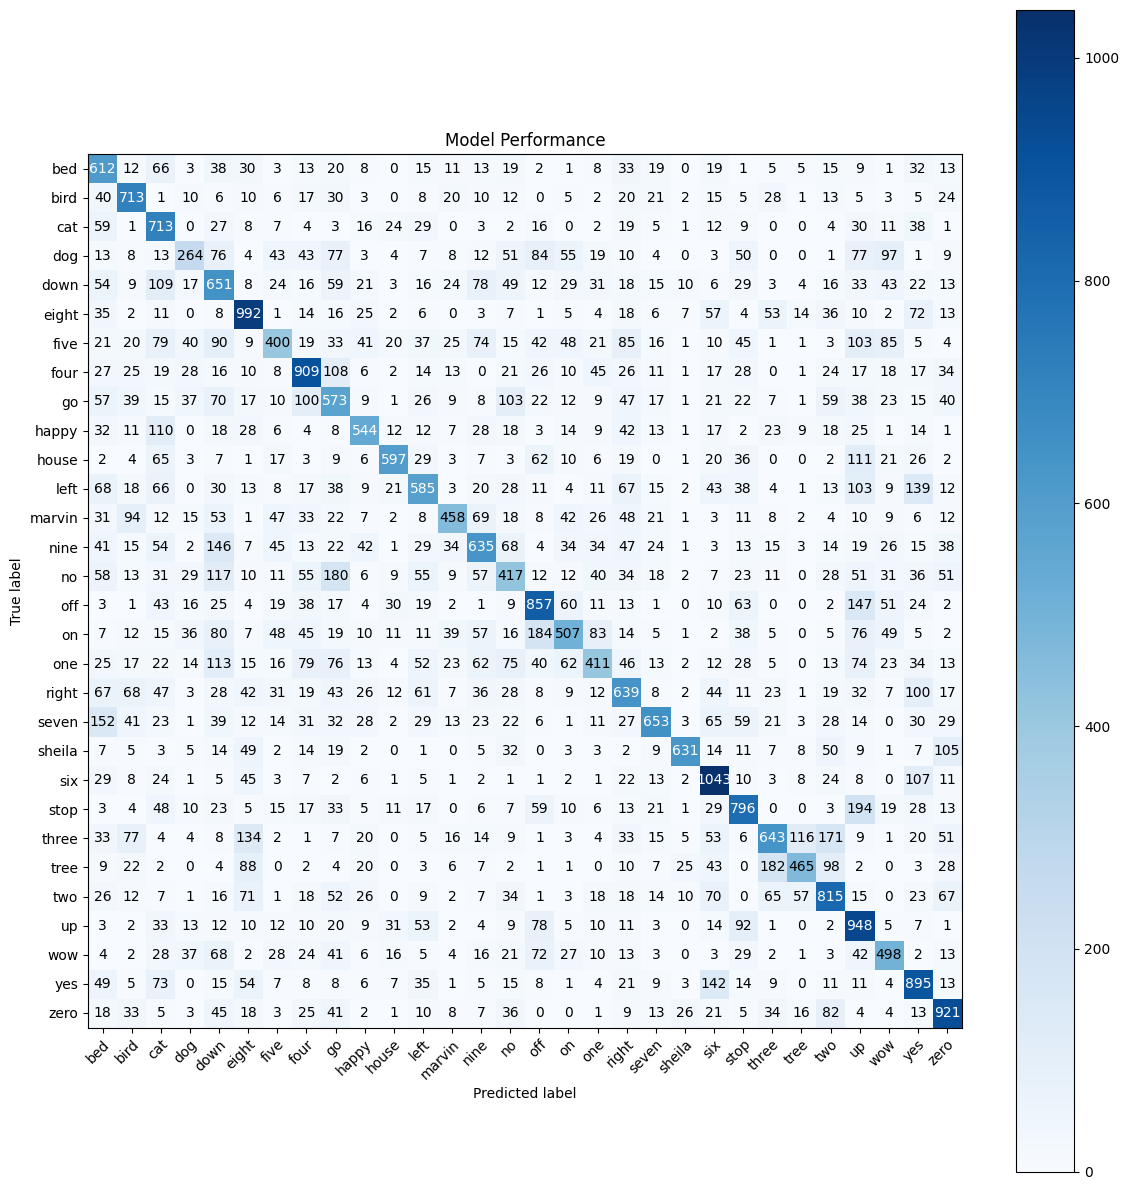

In [15]:
# Compute confusion matrix data
cm = confusion_matrix(y_trues, yhat_probs)

AudioClassifier.plot_confusion_matrix(cm,
                          unique_labels, 
                          normalized=False, 
                          title="Model Performance", 
                          cmap=plt.cm.Blues,
                          size=(12,12))

In [16]:
# Build classification report
re = classification_report(y_trues, yhat_probs, labels=CLASSES, target_names=unique_labels)

print(re)

              precision    recall  f1-score   support

         bed       0.39      0.60      0.47      1026
        bird       0.55      0.69      0.61      1035
         cat       0.41      0.68      0.51      1044
         dog       0.45      0.25      0.32      1036
        down       0.35      0.46      0.40      1422
       eight       0.58      0.70      0.63      1424
        five       0.48      0.29      0.36      1393
        four       0.57      0.61      0.59      1481
          go       0.36      0.41      0.38      1408
       happy       0.59      0.53      0.56      1030
       house       0.72      0.56      0.63      1072
        left       0.49      0.42      0.45      1396
      marvin       0.61      0.42      0.50      1081
        nine       0.50      0.44      0.47      1444
          no       0.36      0.30      0.33      1413
         off       0.53      0.58      0.55      1472
          on       0.52      0.37      0.43      1389
         one       0.48    

## CNN Model

In [11]:
cnn_model = AudioClassifier.build_cnn_model((num_rows, num_columns, num_channels), num_labels)

/home/aashr/miniconda3/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [12]:
history = AudioClassifier.train(cnn_model, X_train, y_train_encoded, "CnnModelFinalV1", epochs=65)

Epoch 1/65


I0000 00:00:1731509422.418331     813 service.cc:148] XLA service 0x7fbdbc007810 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731509422.418898     813 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-11-13 16:50:22.518088: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1731509422.769606     813 cuda_dnn.cc:529] Loaded cuDNN version 90300


   6/1942 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.0289 - loss: 3.5431  

I0000 00:00:1731509427.066388     813 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1942/1942 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3808 - loss: 2.3607
Epoch 1: val_accuracy improved from -inf to 0.84385, saving model to CnnModelFinalV1_best_model.keras
1942/1942 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.3809 - loss: 2.3603 - val_accuracy: 0.8438 - val_loss: 0.7052 - learning_rate: 0.0010
Epoch 2/65
1936/1942 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8149 - loss: 0.7728
Epoch 2: val_accuracy did not improve from 0.84385
1942/1942 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8149 - loss: 0.7726 - val_accuracy: 0.8382 - val_loss: 0.6466 - learning_rate: 0.0010
Epoch 3/65
1940/1942 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8582 - loss: 0.6075
Epoch 3: val_accuracy improved from 0.84385 to 0.86863, saving model to CnnModelFinalV1_best_model.keras
1942/1942 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8582 - loss: 0.6075 - val_accuracy: 0.8686 - val_loss: 0.5673 - learning_rate: 0.0010
Epoch 4/65
1936/1942 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc

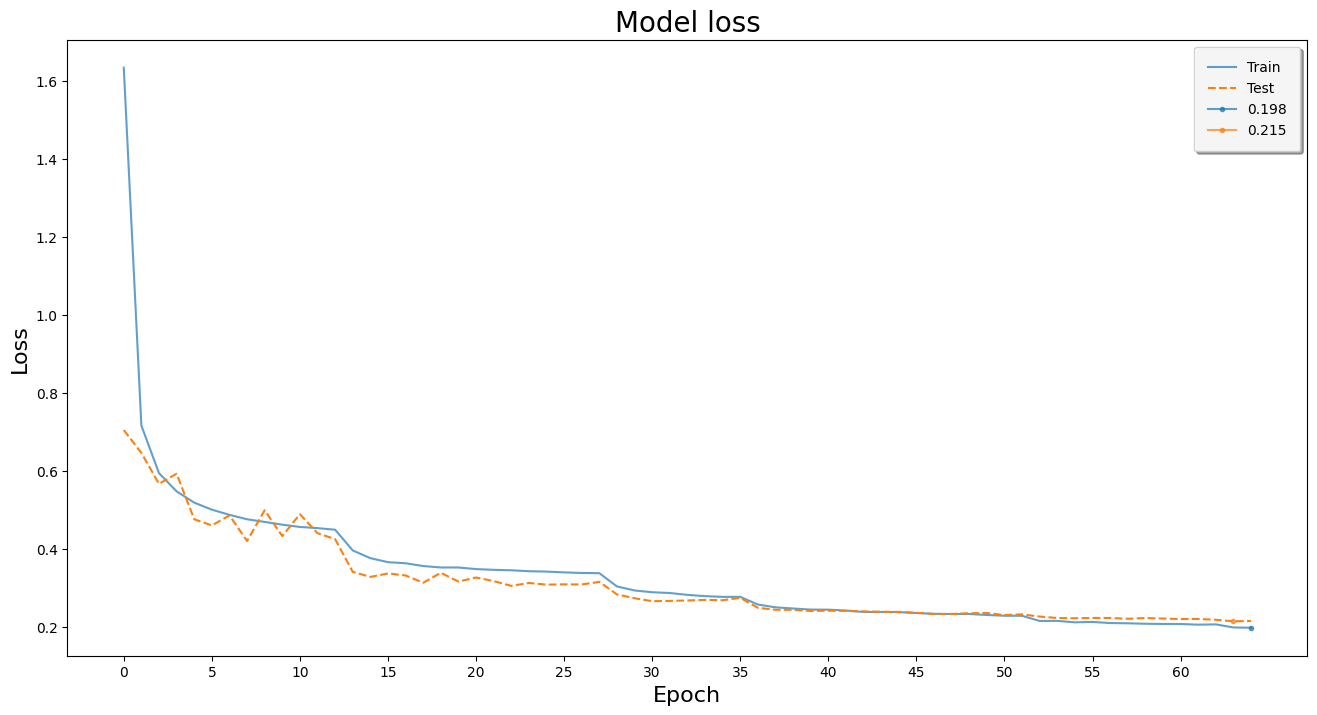

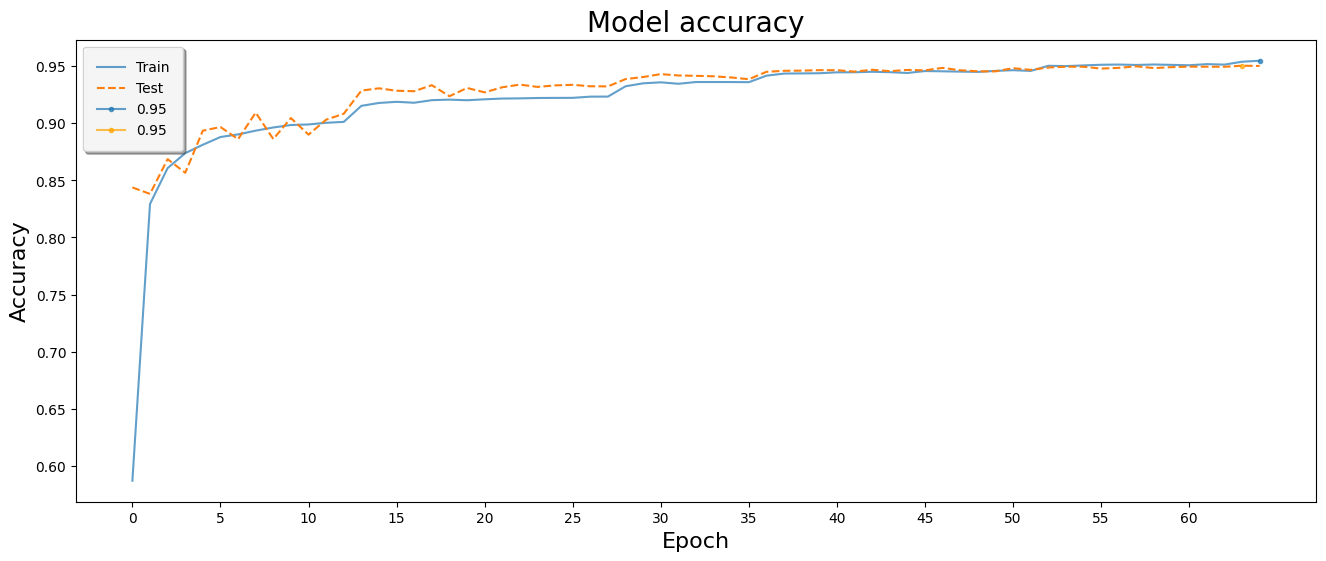

In [13]:
AudioClassifier.plot_train_history(history)

In [14]:
cnn_model.evaluate(X_test,y_test_encoded)

1214/1214 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9522 - loss: 0.2142


[0.21310774981975555, 0.9513043165206909]

In [15]:
# Predict probabilities for test set
y_probs = cnn_model.predict(X_test, verbose=0)

# Get predicted labels
yhat_probs = np.argmax(y_probs, axis=1)
y_trues = np.argmax(y_test_encoded, axis=1)

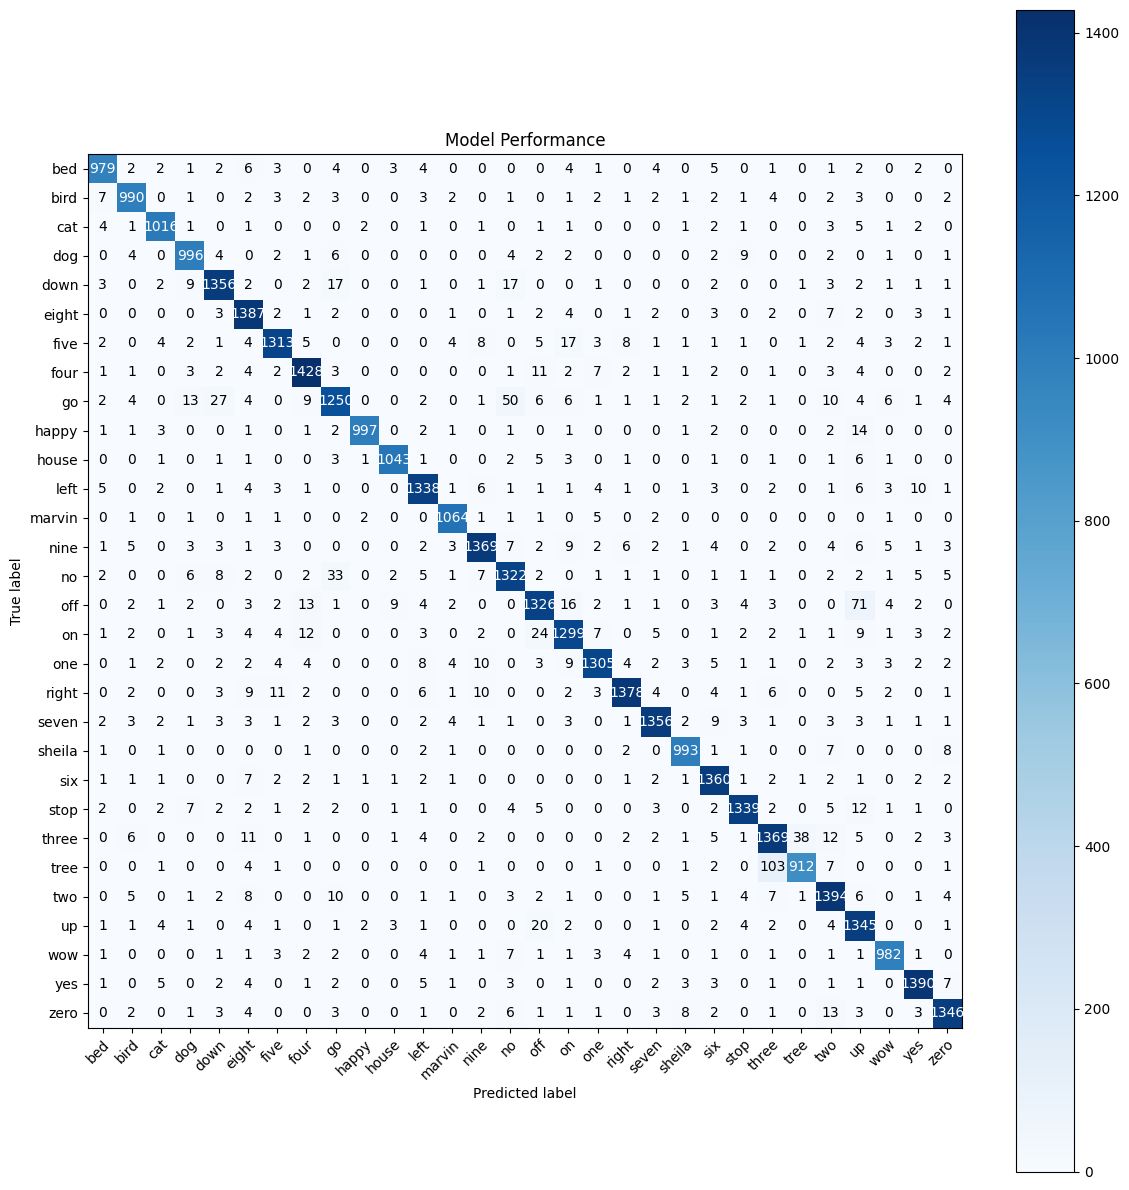

In [16]:
# Compute confusion matrix data
cm = confusion_matrix(y_trues, yhat_probs)

AudioClassifier.plot_confusion_matrix(cm,
                          unique_labels, 
                          normalized=False, 
                          title="Model Performance", 
                          cmap=plt.cm.Blues,
                          size=(12,12))

In [17]:
# Build classification report
re = classification_report(y_trues, yhat_probs, labels=CLASSES, target_names=unique_labels)

print(re)

              precision    recall  f1-score   support

         bed       0.96      0.95      0.96      1026
        bird       0.96      0.96      0.96      1035
         cat       0.97      0.97      0.97      1044
         dog       0.95      0.96      0.95      1036
        down       0.95      0.95      0.95      1422
       eight       0.93      0.97      0.95      1424
        five       0.96      0.94      0.95      1393
        four       0.96      0.96      0.96      1481
          go       0.93      0.89      0.91      1408
       happy       0.99      0.97      0.98      1030
       house       0.98      0.97      0.98      1072
        left       0.95      0.96      0.96      1396
      marvin       0.97      0.98      0.98      1081
        nine       0.96      0.95      0.96      1444
          no       0.92      0.94      0.93      1413
         off       0.93      0.90      0.92      1472
          on       0.94      0.94      0.94      1389
         one       0.97    

In [18]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [19]:
%tensorboard --logdir logs/fit